# Navigation

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.5 which is incompatible.


The environment is already saved in the Workspace and can be accessed at the file path provided below.  Please run the next code cell without making any changes.

In [2]:
from unityagents import UnityEnvironment
import numpy as np

# please do not modify the line below
env = UnityEnvironment(file_name="/data/Banana_Linux_NoVis/Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
print(brain_name)
brain = env.brains[brain_name]
brain
print(brain)

BananaBrain
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [ 1.          0.          0.          0.          0.84408134  0.          0.
  1.          0.          0.0748472   0.          1.          0.          0.
  0.25755     1.          0.          0.          0.          0.74177343
  0.          1.          0.          0.          0.25854847  0.          0.
  1.          0.          0.09355672  0.          1.          0.          0.
  0.31969345  0.          0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agent while it is training**, and you should set `train_mode=True` to restart the environment.

In [5]:
env_info = env.reset(train_mode=True)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    #action = agent.act(state)
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 0.0


In [6]:
#DeepQLearning 
from nn_model import QDeepNetwork
from agent import AiAgent







In [7]:
#Reference Libraries
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

import random
import torch

In [ ]:
#Test to create the instance of AiAgent
firstAI = AiAgent(state_size=37,action_size=4,seed=17)

In [32]:
#Train the Agent
#Function dqn helps to calculate Agent's score when it get interacted with the Environment
def dqn(ai_agent,num_episodes=1000, max_t=1000, eps_start=0.78, eps_end=0.0025, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    
    
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    

    for i_episode in range(1,num_episodes+1):
        #reset the unity Env_info for each new episode
        env_info = env.reset(train_mode=True)[brain_name]
    
        #set initial state 
        state = env_info.vector_observations[0]
    
        score = 0 
        #Iterative run until all number of episodes done
    
        while True:
            action = ai_agent.act(state,eps)
        
            env_info = env.step(action)[brain_name]        #Take action based on Epsilion Greedy Policy
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished 
            
            ai_agent.step(state, action, reward, next_state, done)
            
            score += reward                                # update the score
            state = next_state                             # roll over the state to next time step            
            if done:                                       # exit loop if episode finished
                break
            
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=13.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(ai_agent.qnetwork_local.state_dict(), 'checkpointai13.pth')
            break
        
    return scores      
       

In [33]:
#v9 -Highy score so repeat once  
firstAI1 = AiAgent(state_size=37,action_size=4,seed=24)

num_episodes=1000
max_t=1000
eps_start=0.976 
eps_end=0.0005 
eps_decay=0.979
scores = dqn(firstAI1,num_episodes,max_t,eps_start,eps_end,eps_decay)

Episode 100	Average Score: 3.43
Episode 200	Average Score: 10.21
Episode 300	Average Score: 12.47
Episode 365	Average Score: 13.00
Environment solved in 265 episodes!	Average Score: 13.00


In [31]:
#v11  Updated EveryTimeStep to 4 
firstAI1 = AiAgent(state_size=37,action_size=4,seed=24)

num_episodes=1000
max_t=500
eps_start=0.786 
eps_end=0.0005 
eps_decay=0.9979
scores = dqn(firstAI1,num_episodes,max_t,eps_start,eps_end,eps_decay)

Episode 100	Average Score: 1.39
Episode 200	Average Score: 4.02
Episode 300	Average Score: 5.54
Episode 400	Average Score: 7.09
Episode 500	Average Score: 8.82
Episode 600	Average Score: 9.75
Episode 700	Average Score: 10.47
Episode 800	Average Score: 10.62
Episode 900	Average Score: 11.94
Episode 1000	Average Score: 13.41


In [30]:
#v10  Updated EveryTimeStep to 4 
firstAI1 = AiAgent(state_size=37,action_size=4,seed=24)

num_episodes=1000
max_t=1000
eps_start=0.976 
eps_end=0.0005 
eps_decay=0.979
scores = dqn(firstAI1,num_episodes,max_t,eps_start,eps_end,eps_decay)

Episode 100	Average Score: 2.86
Episode 200	Average Score: 7.62
Episode 300	Average Score: 12.47
Episode 400	Average Score: 14.30
Episode 500	Average Score: 15.12
Episode 600	Average Score: 15.50
Episode 700	Average Score: 15.60
Episode 800	Average Score: 15.92
Episode 900	Average Score: 15.42
Episode 1000	Average Score: 16.10


In [28]:
#v9  Updated EveryTimeStep to 4 
firstAI1 = AiAgent(state_size=37,action_size=4,seed=24)

num_episodes=500
max_t=1000
eps_start=0.976 
eps_end=0.0005 
eps_decay=0.979
scores = dqn(firstAI1,num_episodes,max_t,eps_start,eps_end,eps_decay)

Episode 100	Average Score: 3.82
Episode 200	Average Score: 9.76
Episode 300	Average Score: 12.39
Episode 400	Average Score: 13.94
Episode 500	Average Score: 15.92


In [26]:
#v7  Updated EveryTimeStep to 4 
firstAI1 = AiAgent(state_size=37,action_size=4,seed=24)

num_episodes=500
max_t=1000
eps_start=0.917 
eps_end=0.0007 
eps_decay=0.979
scores = dqn(firstAI1,num_episodes,max_t,eps_start,eps_end,eps_decay)

Episode 100	Average Score: 3.63
Episode 200	Average Score: 9.55
Episode 300	Average Score: 12.56
Episode 400	Average Score: 13.77
Episode 500	Average Score: 15.76


In [25]:
#v7  Updated EveryTimeStep to 4 
firstAI1 = AiAgent(state_size=37,action_size=4,seed=24)

num_episodes=300
max_t=1000
eps_start=0.8217 
eps_end=0.0027 
eps_decay=0.979
scores = dqn(firstAI1,num_episodes,max_t,eps_start,eps_end,eps_decay)

Episode 100	Average Score: 4.41
Episode 200	Average Score: 10.38
Episode 300	Average Score: 12.97


In [23]:
#v6  Updated EveryTimeStep to 4 
firstAI1 = AiAgent(state_size=37,action_size=4,seed=24)

num_episodes=1000
max_t=1000
eps_start=0.7817 
eps_end=0.0017 
eps_decay=0.919
scores = dqn(firstAI1,num_episodes,max_t,eps_start,eps_end,eps_decay)

Episode 100	Average Score: 5.83
Episode 200	Average Score: 9.66
Episode 300	Average Score: 14.07
Episode 400	Average Score: 15.86
Episode 500	Average Score: 16.14
Episode 600	Average Score: 16.67
Episode 700	Average Score: 16.03
Episode 800	Average Score: 16.09
Episode 900	Average Score: 15.98
Episode 1000	Average Score: 15.85


In [18]:
#v6  Updated EveryTimeStep to 4 
firstAI1 = AiAgent(state_size=37,action_size=4,seed=24)

num_episodes=1000
max_t=1000
eps_start=0.7817 
eps_end=0.0025 
eps_decay=0.919
scores = dqn(firstAI1,num_episodes,max_t,eps_start,eps_end,eps_decay)

Episode 100	Average Score: 5.57
Episode 200	Average Score: 10.23
Episode 271	Average Score: 13.03
Environment solved in 171 episodes!	Average Score: 13.03


In [17]:
#v6  Updated EveryTimeStep to 4 
firstAI1 = AiAgent(state_size=37,action_size=4,seed=1)

num_episodes=300
max_t=1000
eps_start=0.6917 
eps_end=0.0015 
eps_decay=0.999
scores = dqn(firstAI1,num_episodes,max_t,eps_start,eps_end,eps_decay)

Episode 100	Average Score: 1.38
Episode 200	Average Score: 3.41
Episode 300	Average Score: 4.86


In [14]:
#v5  Updated EveryTimeStep to 4 
firstAI1 = AiAgent(state_size=37,action_size=4,seed=1)

num_episodes=300
max_t=1000
eps_start=0.24 
eps_end=0.0025 
eps_decay=0.895
scores = dqn(firstAI1,num_episodes,max_t,eps_start,eps_end,eps_decay)

Episode 100	Average Score: 3.51
Episode 200	Average Score: 7.57
Episode 300	Average Score: 11.95


In [12]:
#v4  Updated EveryTimeStep to 4 
firstAI1 = AiAgent(state_size=37,action_size=4,seed=1)

num_episodes=300
max_t=1000
eps_start=0.60 
eps_end=0.0025 
eps_decay=0.895
scores = dqn(firstAI1,num_episodes,max_t,eps_start,eps_end,eps_decay)

Episode 100	Average Score: 4.25
Episode 200	Average Score: 9.85
Episode 300	Average Score: 12.20


In [11]:
#v3  Updated EveryTimeStep to 4 and eps start .78 ep end 0.0025 seed 24
firstAI1 = AiAgent(state_size=37,action_size=4,seed=24)

scores = dqn(firstAI1)

Episode 100	Average Score: 2.06
Episode 200	Average Score: 5.41
Episode 300	Average Score: 9.20
Episode 400	Average Score: 10.88
Episode 500	Average Score: 12.59
Episode 600	Average Score: 14.00
Episode 700	Average Score: 14.58
Episode 800	Average Score: 16.09
Episode 900	Average Score: 15.70
Episode 1000	Average Score: 15.29


In [10]:
#v2  Updated EveryTimeStep to 4 and eps start .78 ep end 0.0025 seed 24
firstAI1 = AiAgent(state_size=37,action_size=4,seed=24)

scores = dqn(firstAI1)

Episode 100	Average Score: 2.10
Episode 200	Average Score: 5.51
Episode 300	Average Score: 8.51
Episode 400	Average Score: 10.66
Episode 500	Average Score: 13.58
Episode 600	Average Score: 15.69
Episode 700	Average Score: 15.40
Episode 800	Average Score: 15.17
Episode 900	Average Score: 15.70
Episode 1000	Average Score: 15.63


In [ ]:
#v2  Updated EveryTimeStep to 4 and eps start .79 seed 24
firstAI1 = AiAgent(state_size=37,action_size=4,seed=17)

scores = dqn(firstAI1)

In [12]:
firstAI1 = AiAgent(state_size=37,action_size=4,seed=24)

scores = dqn(firstAI1)

Episode 100	Average Score: 1.92
Episode 200	Average Score: 6.68
Episode 300	Average Score: 9.01
Episode 400	Average Score: 11.53
Episode 500	Average Score: 12.61


In [ ]:
#v3  Updated EveryTimeStep to 4 and 
firstAI1 = AiAgent(state_size=37,action_size=4,seed=17)

scores = dqn(firstAI1)

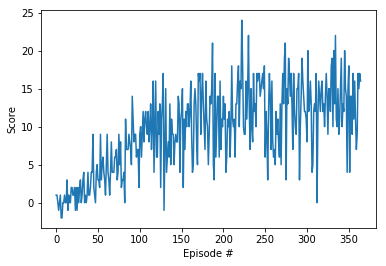

In [34]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [35]:
#Watch the train Agent perfromance
# load the weights from file
firstAI_trained = AiAgent(state_size=37,action_size=4,seed=24)
firstAI_trained.qnetwork_local.load_state_dict(torch.load('checkpointai13.pth'))
          

In [36]:
def test_run_single_episode (env: UnityEnvironment,brain_name, ai_agent:AiAgent=None,max_t=1000,epsl=0.,train_mode=False):
    """Input e """
    env_info = env.reset(train_mode=train_mode)[brain_name]
    action_size = env.brains[brain_name].vector_action_space_size
    state = env_info.vector_observations[0]
    
    #initial the score 
    score =0
    
    #Run each step in the episode
    for _ in range (max_t):
        action = ai_agent.act(state,epsl) if ai_agent else np.random.randint(action_size)
        
        #lets make the agent take the action 
        env_info = env.step(action)[brain_name]
        
        #get the next state 'St+1'
        next_state = env_info.vector_observations[0]
        reward = env_info.rewards[0]
        done = env_info.local_done[0]
        
        if ai_agent and train_mode: #Train mode is True then make the agent learn
            ai_agent.step(state, action, reward, next_state, done)
        
        state = next_state
        score += reward
        if done:
            break
    return score
        
            

In [38]:
# Test Run score
score = test_run_single_episode(env, brain_name, firstAI_trained)

print(f'Score: {score}')

Score: 12.0


When finished, you can close the environment.

In [ ]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agent while it is training.  However, **_after training the agent_**, you can download the saved model weights to watch the agent on your own machine! 